Storytelling with Data Presentation
CIS 4170 Prof. Anna O' Connell
Alexander Batch 02/27/22 alexander.batch@baruchmail.cuny.edu

------
Code to get data, clean, add fields, and get ready to visualize.

In [25]:
# data wrangling imports
import numpy as np
import pandas as pd

# graphing and plotting friends
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8] # change default plot sizes to b bigger

In [26]:
# source: https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies/version/1

df = pd.read_csv('Highest_Holywood_Grossing_Movies.csv', index_col=0, low_memory=True)

df = df.dropna(how='all') # drop empty rows

# add year from title to new column
for i in df.index:
    year = df.loc[i, 'Title'][-5:-1]
    df.loc[i,'Year'] = year

# df.dropna(inplace=True) # drop rows with missing data

df['Release Date'] = pd.to_datetime(df['Release Date'])

# change sales into millions for better readibility
df['Domestic Sales (in $)'] = round((df['Domestic Sales (in $)'] / 1000000), 3)
df['International Sales (in $)'] = round((df['International Sales (in $)'] / 1000000), 3)
df['World Sales (in $)'] = round((df['World Sales (in $)'] / 1000000), 3)

# print(df.head())
# print('-'*40)
# print(df.info())
# print('-'*40)
# print(df.describe().applymap(lambda x: f"{x:0.3f}"))

In [27]:
# add new fields

df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day
df["Day of Week"] = df['Release Date'].dt.dayofweek

df['Domestic vs International Sales Ratio'] = df['Domestic Sales (in $)'] / df['World Sales (in $)']

# print(df.head())
# print('-'*40)
# print(df.describe())

--------
Checking if any obvious correlations. Doesn't seem to be besides maybe day of week with sales.

In [28]:
correlations = df.corr()
correlations.style.background_gradient(cmap='bwr_r', axis=None).set_precision(2)

# No strong correlations pop out except for maybe day of week w/ sales

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Year,Month,Day,Day of Week,Domestic vs International Sales Ratio
Domestic Sales (in $),1.00,0.80,0.90,0.09,-0.02,0.03,-0.22,-0.22
International Sales (in $),0.80,1.00,0.98,0.25,-0.03,0.06,-0.32,-0.60
World Sales (in $),0.90,0.98,1.00,0.21,-0.03,0.05,-0.30,-0.51
Year,0.09,0.25,0.21,1.00,-0.07,-0.02,-0.42,-0.28
Month,-0.02,-0.03,-0.03,-0.07,1.00,-0.01,0.08,0.03
Day,0.03,0.06,0.05,-0.02,-0.01,1.00,-0.01,-0.03
Day of Week,-0.22,-0.32,-0.30,-0.42,0.08,-0.01,1.00,0.31
Domestic vs International Sales Ratio,-0.22,-0.60,-0.51,-0.28,0.03,-0.03,0.31,1.00


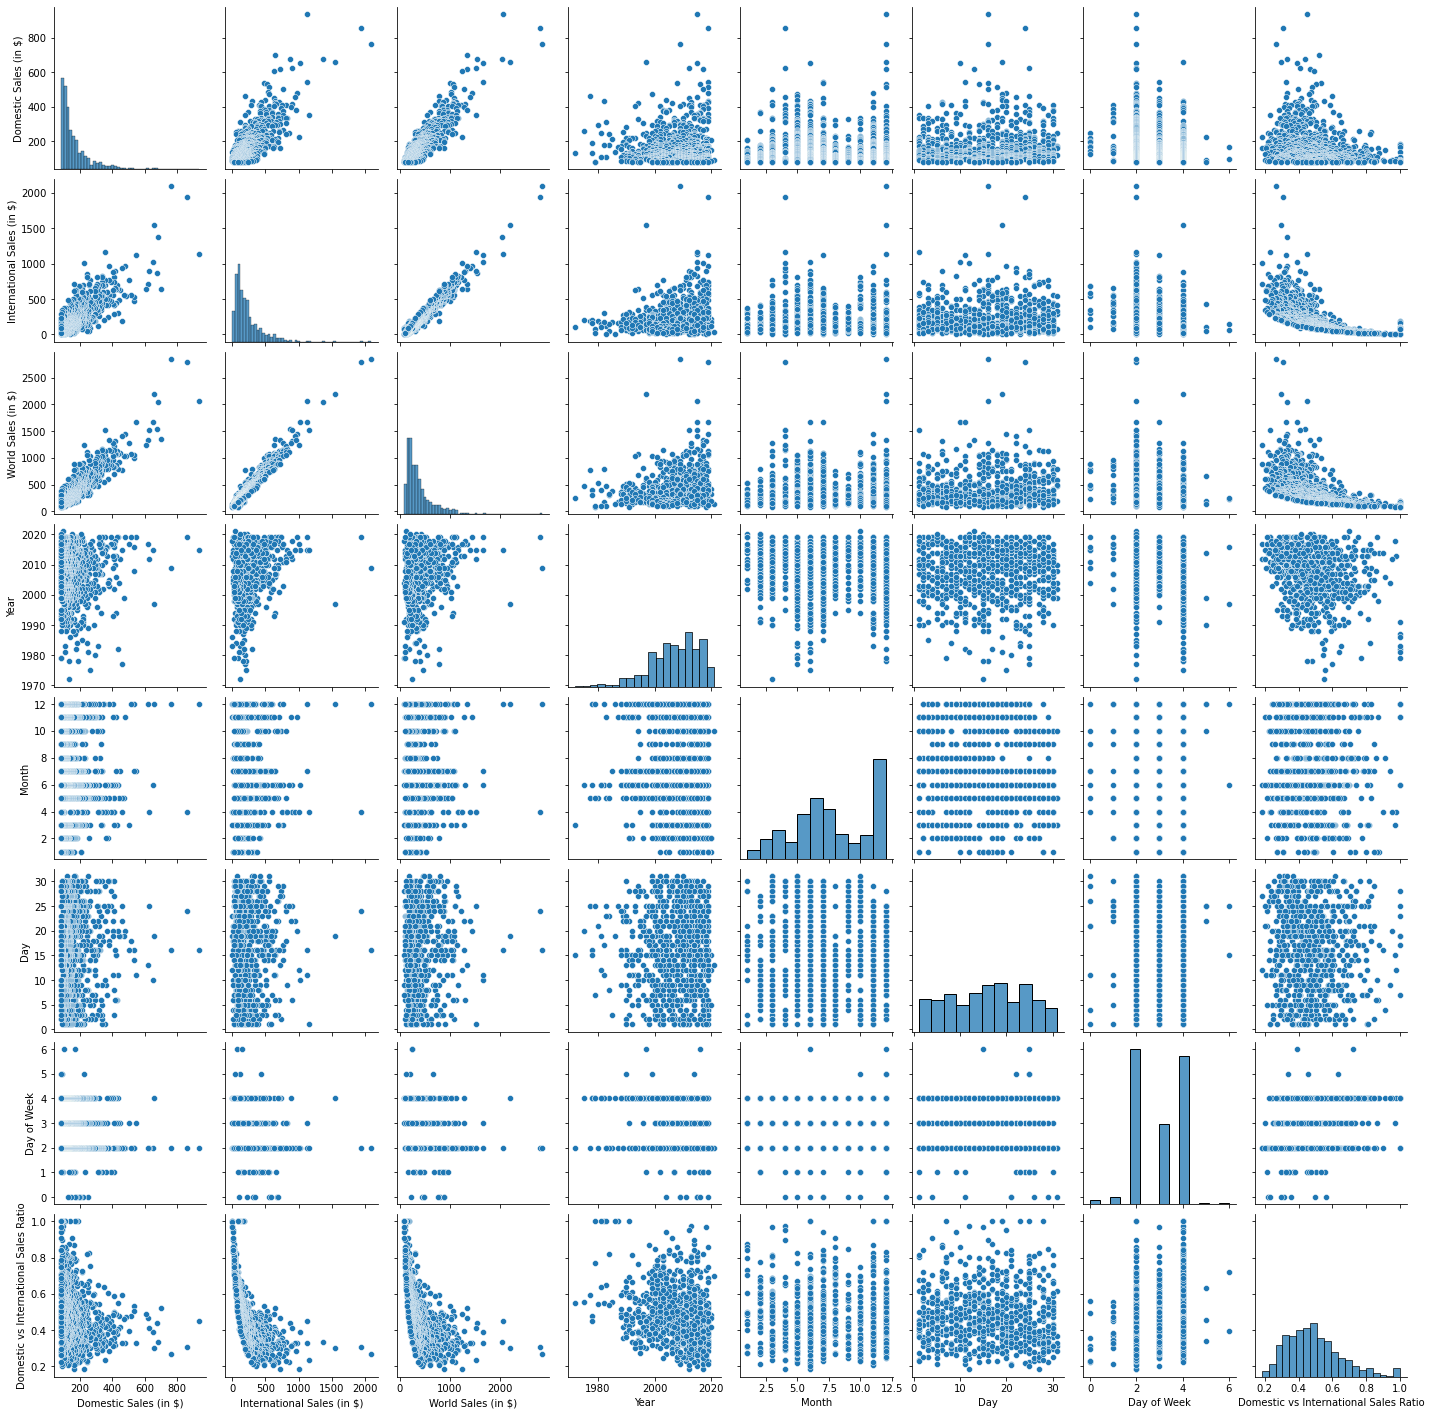

In [29]:
# visualizations

sns.pairplot(df) # prelim look at data & features

------
Histogram 1: Most of the top grossing 1,000 movies have happened in recent years.

Histogram 2: Most top movies come out either during spring or winter time. 

Histogram 3: Not incredibly clear, but top movies tend to come out more towards midle and end of month.

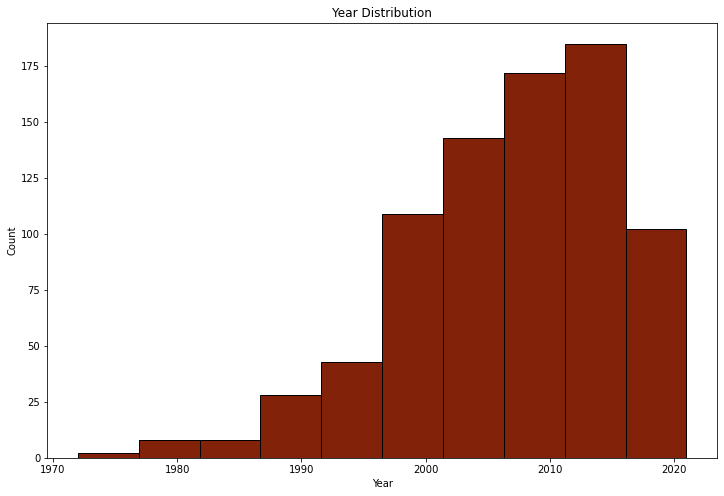

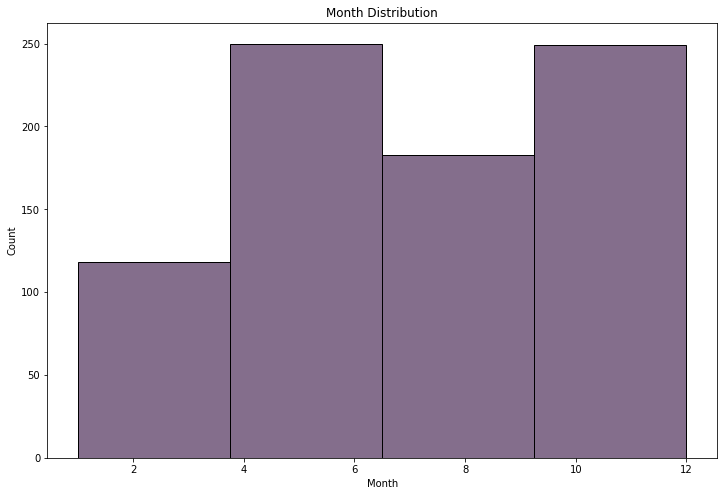

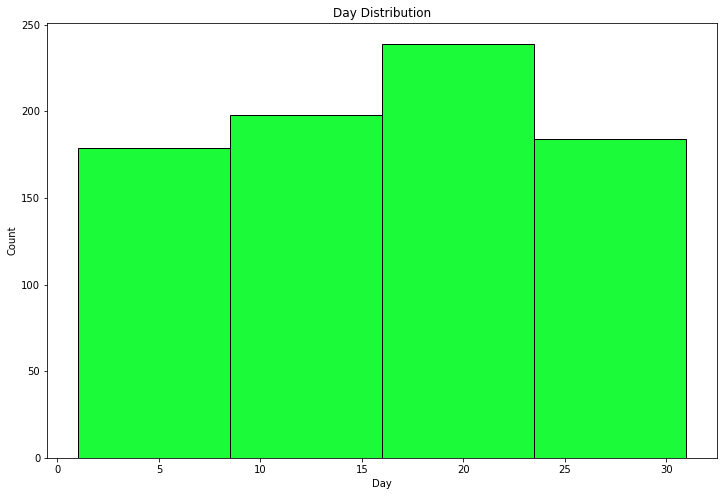

In [30]:
# histogram fun
plt.hist(df['Year'], bins=10, edgecolor='black', color=np.random.rand(3,))
plt.xlabel('Year'); plt.ylabel('Count'); plt.title('Year Distribution')
plt.show()

plt.hist(df['Month'], bins=4, edgecolor='black', color=np.random.rand(3,))
plt.xlabel('Month'); plt.ylabel('Count'); plt.title('Month Distribution')
plt.show()

plt.hist(df['Day'], bins=4, edgecolor='black', color=np.random.rand(3,))
plt.xlabel('Day'); plt.ylabel('Count'); plt.title('Day Distribution')
plt.show()

------
Histogram 1: No suprise to see a long tail on the highest movie grosses, most will fall on lower amounts.

Histogram 2: Domestic Vs. International Ratio measures if a movie makes more domestically than in international box office. It appears a slight skew to the left shows that international gets a slighlty bigger slice of the pie.

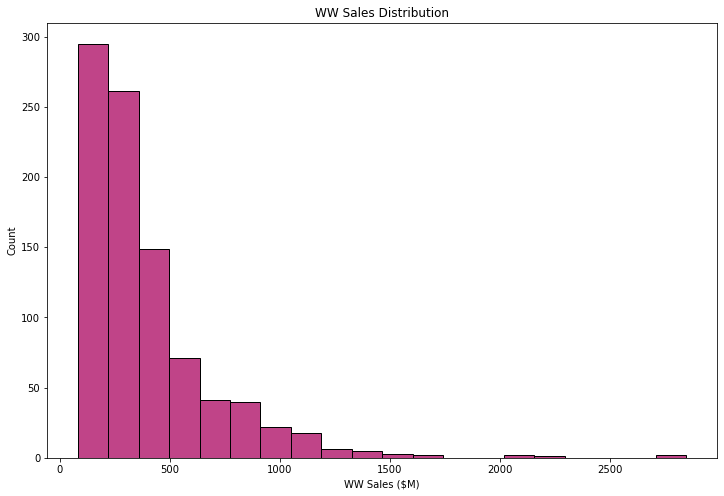

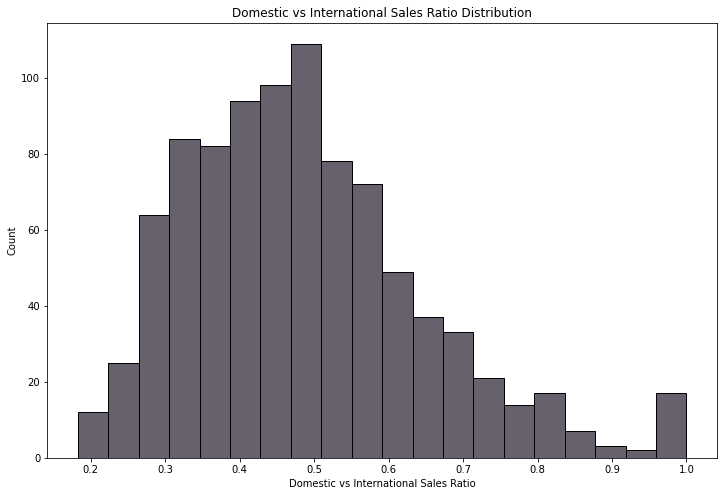

In [31]:
plt.hist(df['World Sales (in $)'], bins=20, edgecolor='black', color=np.random.rand(3,))
plt.xlabel('WW Sales ($M)'); plt.ylabel('Count'); plt.title('WW Sales Distribution')
plt.show()

plt.hist(df['Domestic vs International Sales Ratio'], bins=20, edgecolor='black', color=np.random.rand(3,))
plt.xlabel('Domestic vs International Sales Ratio'); plt.ylabel('Count'); plt.title('Domestic vs International Sales Ratio Distribution')
plt.show()

------
Bar Plot 1: Yearly movie sales. Can see over time more money has been being made.

Bar Plot 2: Sales broken up by month shows April and December as two strongest months with January the weakest.

Bar Plot 3: The last shows only two significant bars, one being the 24th which most likely is Christmas.  Not sure what the 16th would fall under holiday or event wise.

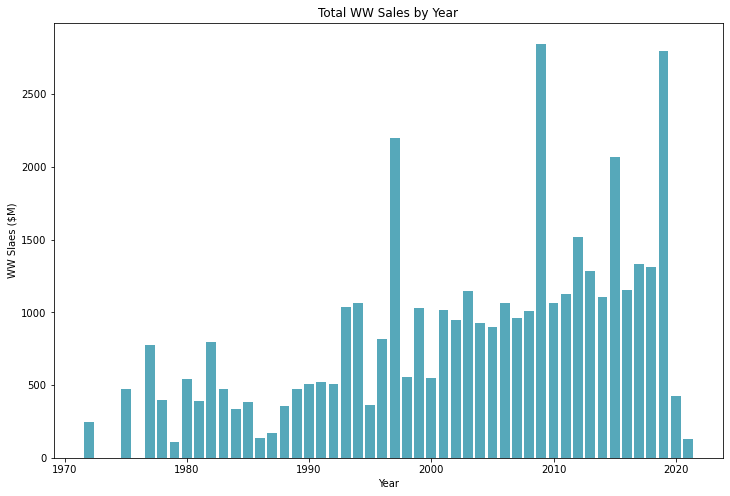

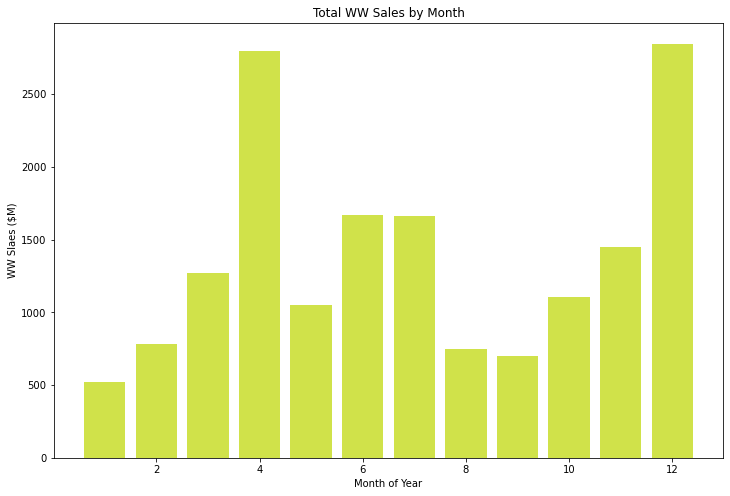

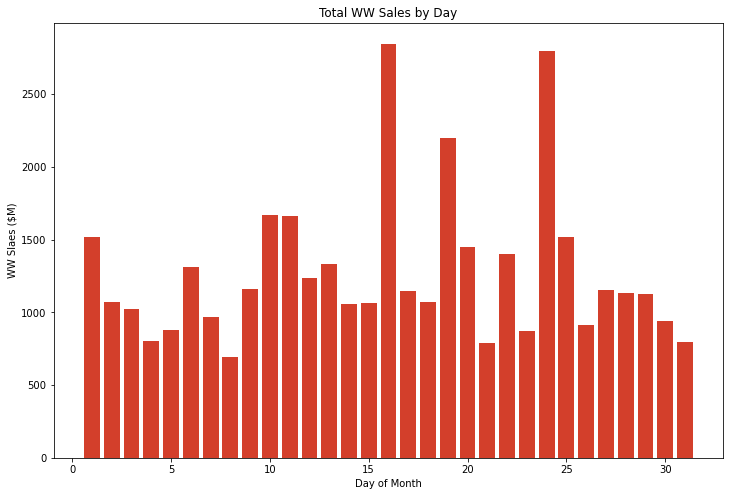

In [35]:
plt.bar(df['Year'], df['World Sales (in $)'], color=np.random.rand(3,))
plt.xlabel('Year'); plt.ylabel('WW Slaes ($M)')
plt.title('Total WW Sales by Year') ; plt.show()

plt.bar(df['Month'], df['World Sales (in $)'], color=np.random.rand(3,))
plt.xlabel('Month of Year'); plt.ylabel('WW Slaes ($M)')
plt.title('Total WW Sales by Month') ; plt.show()

plt.bar(df['Day'], df['World Sales (in $)'], color=np.random.rand(3,))
plt.xlabel('Day of Month'); plt.ylabel('WW Slaes ($M)')
plt.title('Total WW Sales by Day') ; plt.show()

------
Bar Plot 1: Recent years have had the best run with 2019, 2015, and 2017 leading the way. 3 of top 5 being in last five years.

Bar Plot 2: Average sales shows recent years strong also, but with more of a mix with cult classics like Jaws and Star Wars bringing up the averages in the late 1970's and 1980's.

Bar Plot 3: It appears the years that Domestic Sales share dominated were further in the past than in the more modern day of globilisim.

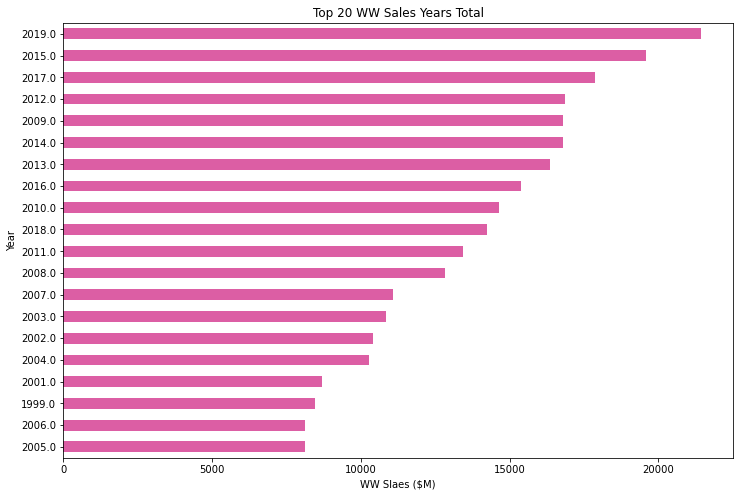

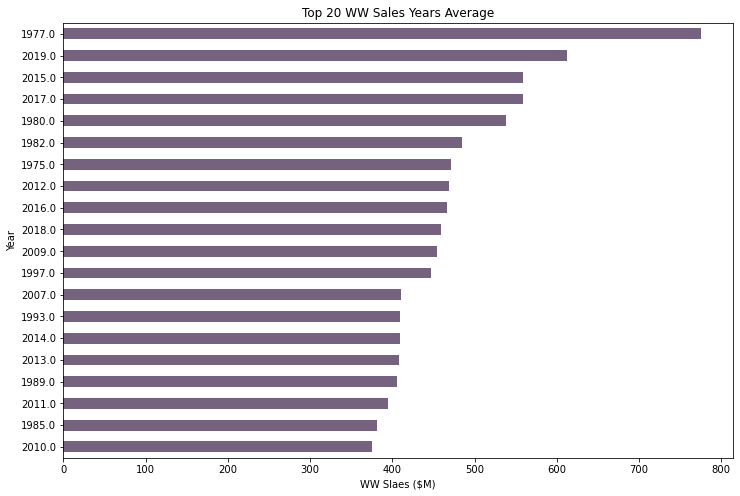

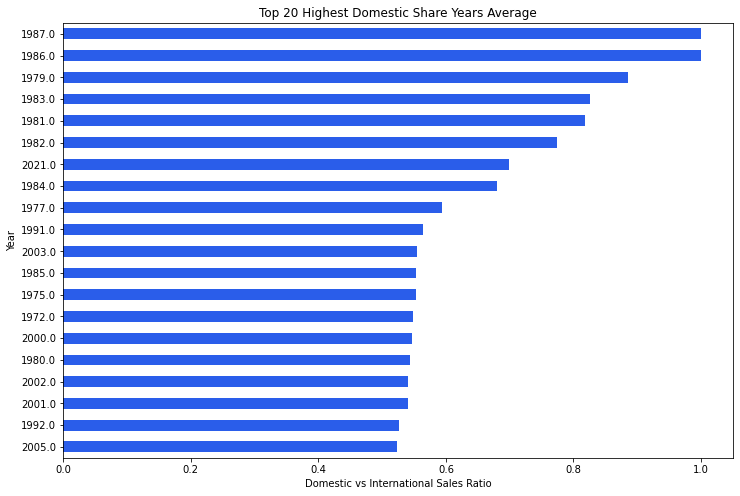

In [34]:
df.groupby('Year').sum()['World Sales (in $)'].sort_values(ascending=False).head(20).plot(kind='barh', color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)')
plt.title('Top 20 WW Sales Years Total') ; plt.show()

df.groupby('Year').mean()['World Sales (in $)'].sort_values(ascending=False).head(20).plot(kind='barh', color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)')
plt.title('Top 20 WW Sales Years Average') ; plt.show()

df.groupby('Year').mean()['Domestic vs International Sales Ratio'].sort_values(ascending=False).head(20).plot(kind='barh', color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('Domestic vs International Sales Ratio')
plt.title('Top 20 Highest Domestic Share Years Average') ; plt.show()

------
Bar Plot 1: 20th Century and Walt Disney have made the two largest grossing movies of all time (and also are combined now into one).

Bar Plot 2: Walt Disney smokes the compeition for lifetime gross of movies. Columbia is the lowest non-specialized studio.

Bar Plot 3: Two smaller names lead the average gross, thanks to low sample size, but Disney is once again found towards the top.

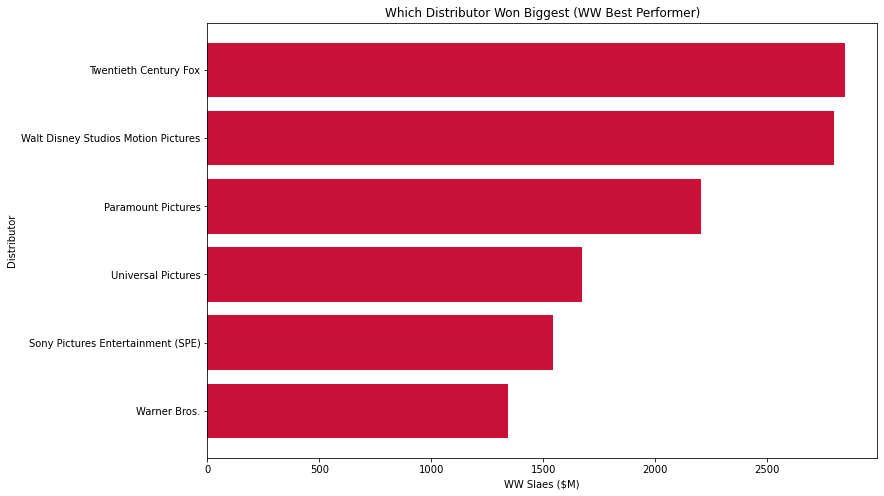

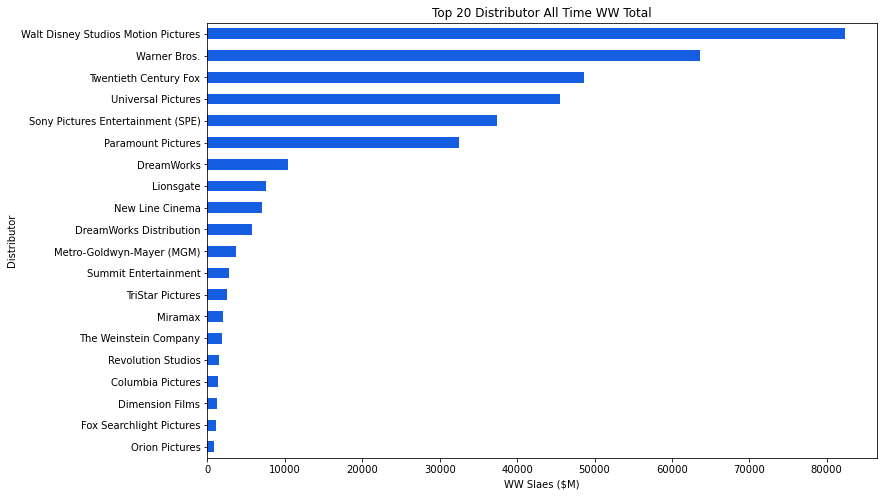

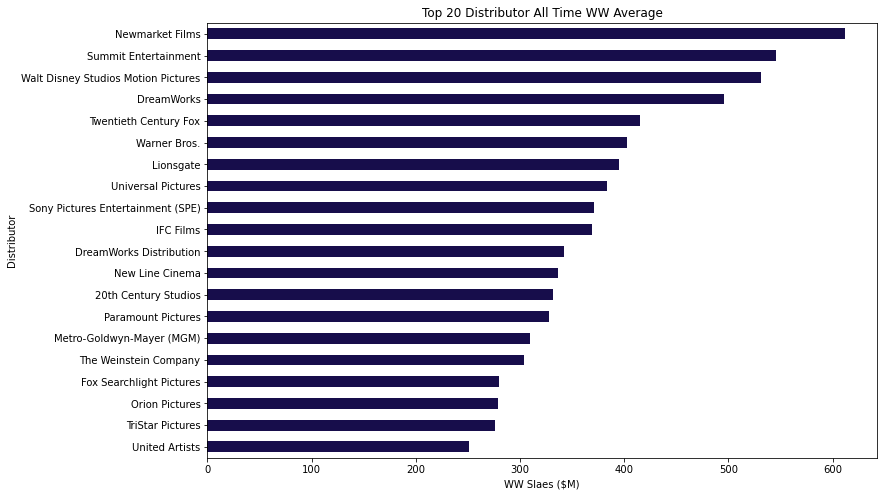

In [15]:
top_world = df.nlargest(20, 'World Sales (in $)', keep='all')
plt.barh(top_world['Distributor'], top_world['World Sales (in $)'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)'); plt.ylabel('Distributor')
plt.title('Which Distributor Won Biggest (WW Best Performer)') ; plt.show()

df.groupby('Distributor').sum()['World Sales (in $)'].sort_values(ascending=False).head(20).plot(kind='barh', color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)')
plt.title('Top 20 Distributor All Time WW Total') ; plt.show()

df.groupby('Distributor').mean()['World Sales (in $)'].sort_values(ascending=False).head(20).plot(kind='barh', color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)')
plt.title('Top 20 Distributor All Time WW Average') ; plt.show()

------
Bar Plot 1: Many findings of Star Wars and Marvel movies lead, with James Cameron bucking the trend with his two original movies "Avatar" and "Titanic" in the top 3.

Bar Plot 2: Domestically, Star Wars and Marvel fares better.

Bar Plot 3: Internationally a wider mix of movies, but Avatar, Titanic, and Marvel show huge legs up. Star Wars is much lower here.

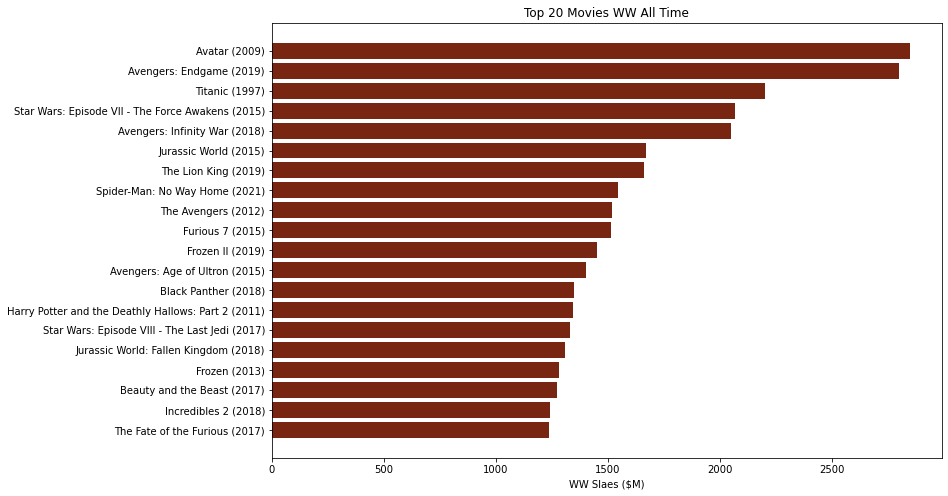

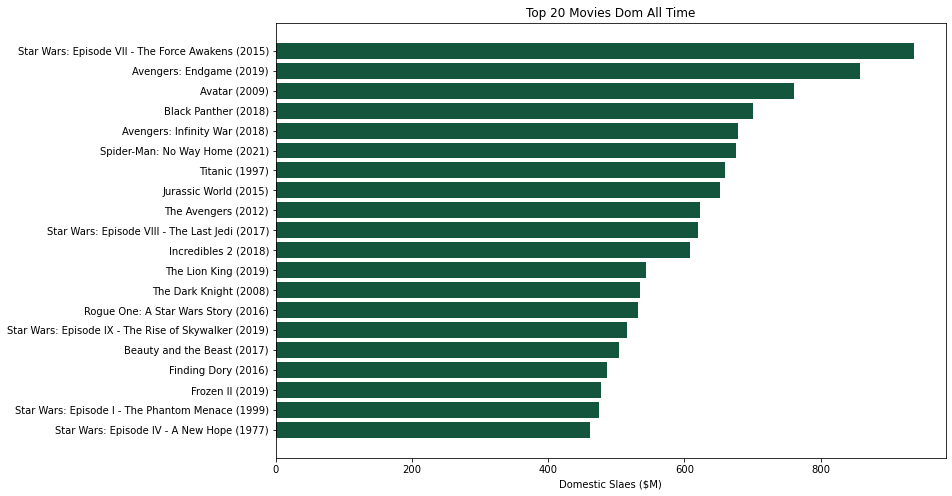

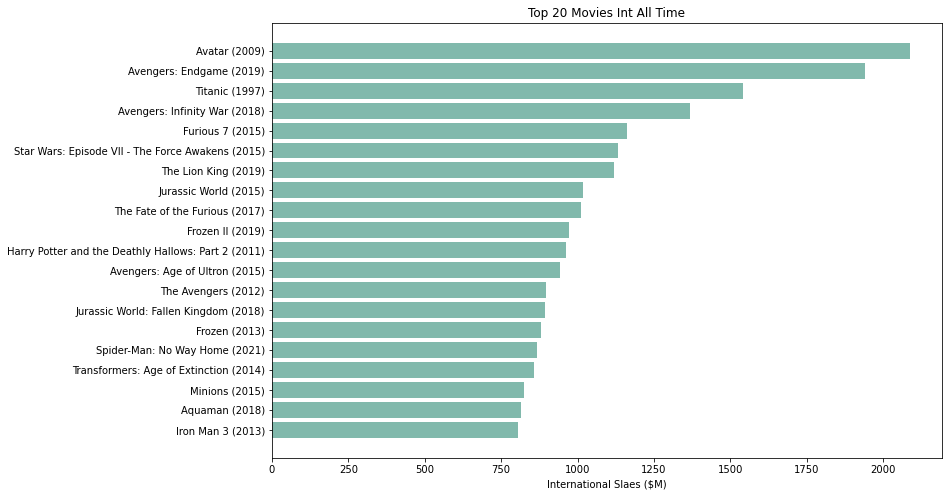

In [17]:
plt.barh(top_world['Title'], top_world['World Sales (in $)'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('WW Slaes ($M)')
plt.title('Top 20 Movies WW All Time') ; plt.show()

top_domest = df.nlargest(20, 'Domestic Sales (in $)', keep='all')
plt.barh(top_domest['Title'], top_domest['Domestic Sales (in $)'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('Domestic Slaes ($M)')
plt.title('Top 20 Movies Dom All Time') ; plt.show()

top_inter = df.nlargest(20, 'International Sales (in $)', keep='all')
plt.barh(top_inter['Title'], top_inter['International Sales (in $)'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('International Slaes ($M)')
plt.title('Top 20 Movies Int All Time') ; plt.show()

------
Scatter Plot 1: New movies tend to make more money, but no clear trend if they make more domestically or internationally. The best fit line has an equation of y=1.67x - 49.22 showing international is about 30 to 40% of world wide gross sales.

Bar Plot 1: Comedies (Think Like Man / Anchorman / Talledega Nights), war movies (Platoon / Apocalypse Now), and racial movies (42 / Remember the Titans / The Blind Side) seem to have the highest domestic grosses.

Bar Plot 2: A solid mix of movies have much higher international appeal. Fast and Furious Franchise leads with 3 movies followed by 2 movies each of the Pirates of Carribean and Transformers Franchises. Action and Animated seem to have the broadest appeal no matter what culture.

y=1.67 x + -49.22


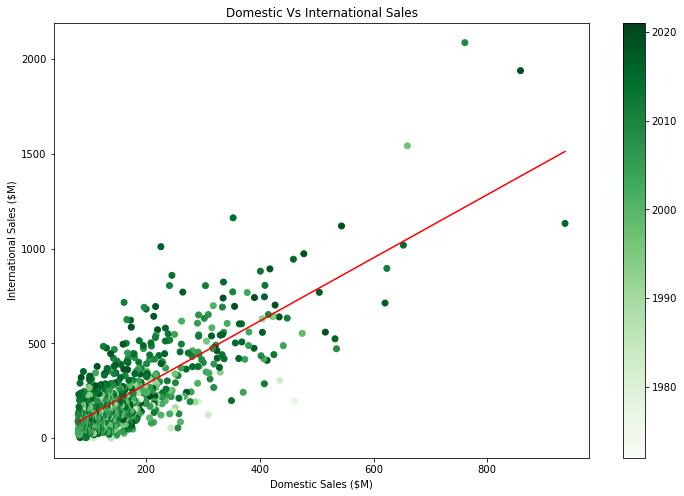

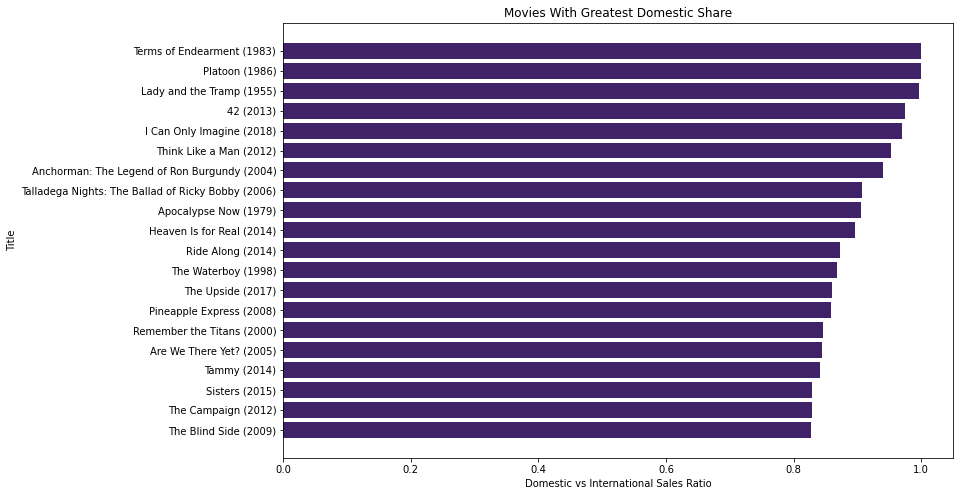

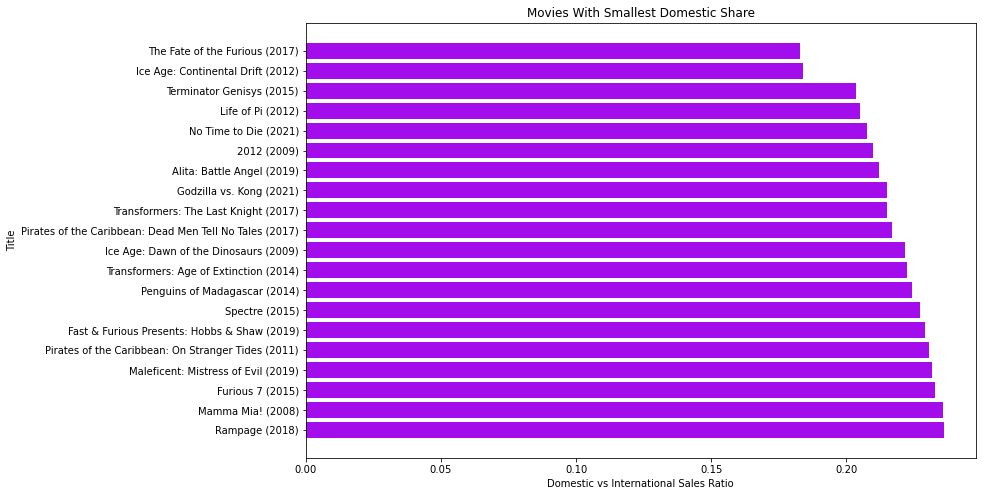

In [18]:
share = df[df['Domestic vs International Sales Ratio'] <1 ] # get rid of possible errors

# scatter dom vs int with best fit line
x = share['Domestic Sales (in $)']
y= share['International Sales (in $)']
sc = plt.scatter(x, y, c=share['Year'], cmap="Greens")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1])) # best fit line equation
plt.plot(x, p(x), 'r-')
plt.xlabel('Domestic Sales ($M)'); plt.ylabel('International Sales ($M)')
plt.colorbar(sc)
plt.title('Domestic Vs International Sales') ; plt.show()

# highest and smallest 
top_dom = share.nlargest(20, 'Domestic vs International Sales Ratio', keep='all')
plt.barh(top_dom['Title'], top_dom['Domestic vs International Sales Ratio'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('Domestic vs International Sales Ratio'); plt.ylabel('Title')
plt.title('Movies With Greatest Domestic Share') ; plt.show()

bot_dom = share.nsmallest(20, 'Domestic vs International Sales Ratio', keep='all')
plt.barh(bot_dom['Title'], bot_dom['Domestic vs International Sales Ratio'], color=np.random.rand(3,))
plt.gca().invert_yaxis()
plt.xlabel('Domestic vs International Sales Ratio'); plt.ylabel('Title')
plt.title('Movies With Smallest Domestic Share') ; plt.show()